In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('SchizophreniaSymptomnsData.csv')
df.drop(columns=['Name'], inplace=True)

In [3]:
gd_map = {
    'Female' : 0,
    'Male' : 1
}

marital_stat_map = {
    'Single': 0, 
    'Married': 1, 
    'Divorced': 2, 
    'Widowed': 3
}

label_map = {
    'Low Proneness' : 0,
    'Moderate Proneness' : 1,
    'Elevated Proneness' : 2,
    'High Proneness': 3,
    'Very High Proneness': 4
}

df['Gender'] = df['Gender'].map(gd_map)
df['Marital_Status'] = df['Marital_Status'].map(marital_stat_map)
df['Schizophrenia'] = df['Schizophrenia'].map(label_map)
df

,Age,Gender,Marital_Status,Fatigue,Slowing,Pain,Hygiene,Movement,Schizophrenia
0,68,0,0,0.698075,0.123064,0.375303,0.234639,0.251869,2
1,88,1,1,0.049245,-0.042080,0.432807,0.501238,0.379948,1
2,67,0,1,0.651995,0.187117,NaN,0.301942,0.302588,2
3,95,0,3,0.036324,0.580808,0.005356,0.306968,0.813618,1
4,81,0,3,0.926727,0.484202,0.702405,0.736054,0.579448,3
...,...,...,...,...,...,...,...,...,...
4995,61,0,0,0.933016,0.505532,1.010435,0.868590,0.552105,3
4996,60,0,0,0.260125,0.625811,-0.076161,0.079046,0.593206,1
4997,62,1,1,0.248583,NaN,0.596990,0.119659,0.782998,1
4998,76,0,3,0.265702,0.525682,0.546284,0.402468,0.222236,1


In [4]:
df.dropna(axis=0, inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(12, 6), activation='relu', solver='adam', max_iter=1000, random_state=42, learning_rate_init=0.01)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:2f}%")
print(f"Classification report:\n", classification_report(y_test, y_pred))


InvalidParameterError: The 'activation' parameter of MLPClassifier must be a str among {'relu', 'identity', 'logistic', 'tanh'}. Got 'softmax' instead.

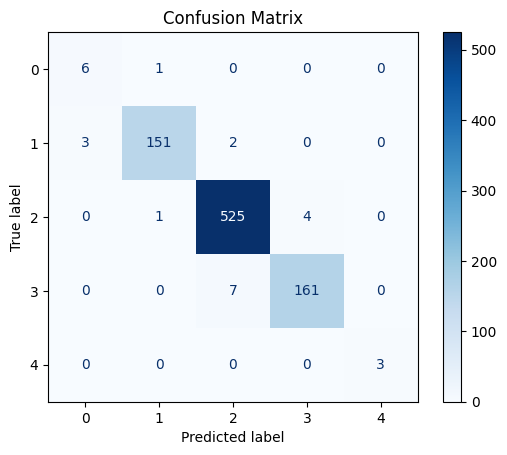

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()